In [32]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from hydra import initialize, compose
from lenstronomy.Plots import plot_util

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import overplot, plot
from mejiro.lenses import test
from mejiro.lenses.test import SampleSkyPyLens
from mejiro.helpers import lenstronomy_sim, pyhalo

In [33]:
array_dir = os.path.join(array_dir, 'sample_skypy_lens')
pickle_dir = config.machine.dir_03

In [34]:
lens_dict, rgb_image, rgb_model = test.get_sample(config.machine.dir_03, config.machine.dir_05, 6)

lens = lens_dict['lens']
model = lens_dict['model']

side = 10.01
lens.update_model()

In [35]:
roman, _ = lenstronomy_sim.get_image(lens, 'roman', side)
roman_rgb, _ = lenstronomy_sim.get_image(lens, 'roman_rgb', side)
lsst, _ = lenstronomy_sim.get_image(lens, 'lsst', side)
des, _ = lenstronomy_sim.get_image(lens, 'des', side)
hst, _ = lenstronomy_sim.get_image(lens, 'hst', side)
euclid, _ = lenstronomy_sim.get_image(lens, 'euclid', side)

In [36]:
scale_max = 50

roman = plot_util.sqrt(roman, scale_min=0, scale_max=scale_max)
roman_rgb = plot_util.sqrt(roman_rgb, scale_min=0, scale_max=scale_max)
lsst = plot_util.sqrt(lsst, scale_min=0, scale_max=scale_max)
des = plot_util.sqrt(des, scale_min=0, scale_max=scale_max)
hst = plot_util.sqrt(hst, scale_min=0, scale_max=scale_max)
euclid = plot_util.sqrt(euclid, scale_min=0, scale_max=scale_max)
# rgb_image = plot_util.sqrt(rgb_image, scale_min=0, scale_max=scale_max)

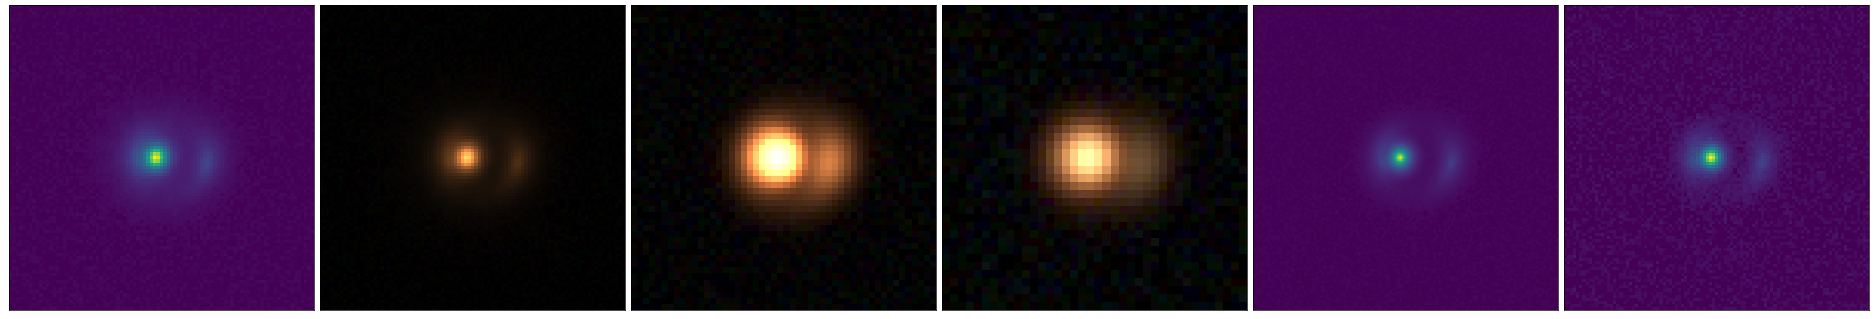

In [37]:
plot.plot_list([roman, roman_rgb, lsst, des, hst, euclid]) 

In [49]:
array_list = [rgb_image, lsst, euclid, hst]
title_list = ['Roman\n(F106, F129, F184)', 'LSST\n(g, r, i)', 'Euclid\n(VIS)', 'HST\n(WFC3 F160W)']

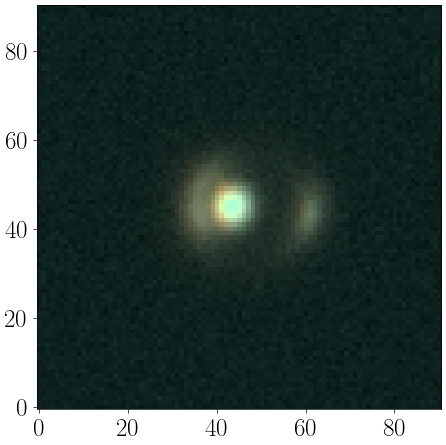

In [50]:
plt.imshow(rgb_image)

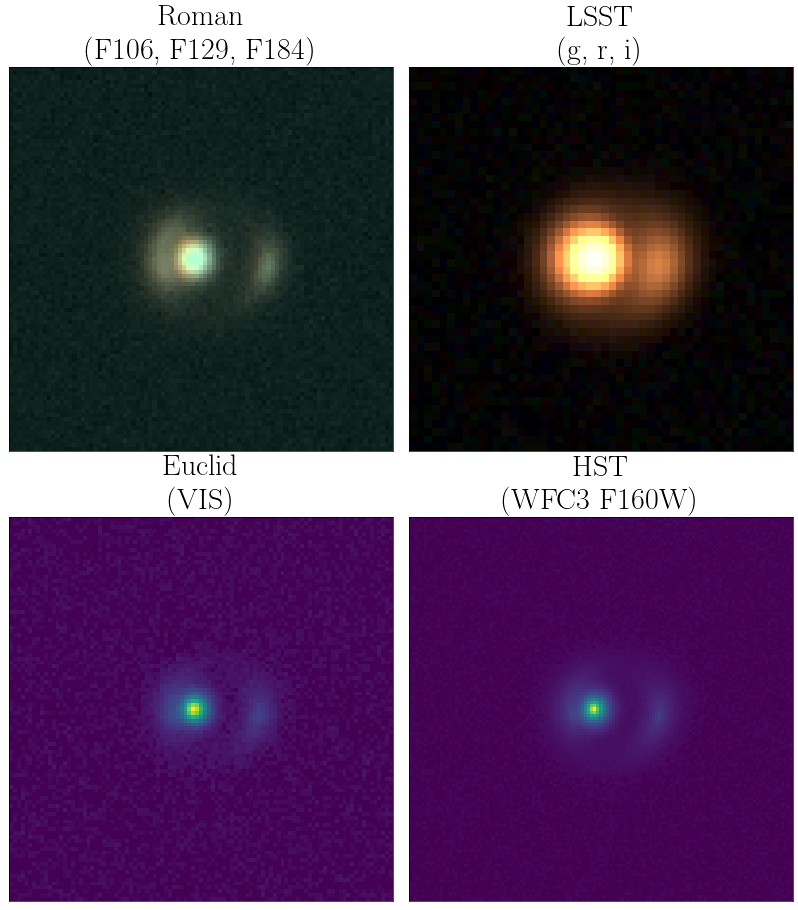

In [61]:
side = 2

fontsize = 18
import matplotlib
matplotlib.rcParams.update({'font.size': fontsize})

fig, ax = plt.subplots(nrows=side, ncols=side, figsize=(8, 9), constrained_layout=True)

for i, array in enumerate(array_list):
    ax[i // side, i % side].imshow(array)
    ax[i // side, i % side].get_xaxis().set_visible(False)
    ax[i // side, i % side].get_yaxis().set_visible(False)
    ax[i // side, i % side].set_title(title_list[i])

plt.savefig(os.path.join(figure_dir, 'telescope_compare.png'))
plt.show()